

# Iterative Application of the Bellman Equation in Gridworld (Deterministic)

The **iterative application of the Bellman Equation** is the key to solving value functions in Reinforcement Learning. In a deterministic environment, the Bellman Equation is applied repeatedly to each state until the value function converges. This notebook provides a detailed breakdown of the process.

---

## Bellman Equation Recap

For a deterministic environment, the Bellman Equation for a state $s$ under a given policy $\pi$ is:

$$
V(s) = R(s, \pi(s)) + \gamma V(s')
$$

Where:
- $V(s)$: Value of state $s$.
- $R(s, \pi(s))$: Immediate reward for taking action $\pi(s)$ in state $s$.
- $s'$: The next state reached by following $\pi(s)$.
- $\gamma$: Discount factor ($0 \leq \gamma \leq 1$).

The iterative method involves repeatedly applying this equation to update the value of each state.

---

## Step-by-Step Iterative Process

### Step 1: Initialize Values
- Initialize $V(s)$ for all states $s$. A common choice is $V(s) = 0$ for all states.

### Step 2: Apply the Bellman Equation
- For each state $s$ (except terminal states):
  1. Use the current value of $V(s')$ for the next state $s'$.
  2. Update $V(s)$ using the Bellman Equation.

### Step 3: Repeat
- Repeat Step 2 for multiple iterations, updating $V(s)$ based on the values from the previous iteration.

### Step 4: Convergence
- The process stops when the values $V(s)$ stop changing significantly (convergence), indicating that the value function is stable.

---

## Gridworld Example in Detail

### Environment Setup
- **Grid Size**: 3x3
- **Rewards**: $-1$ per step, $+10$ at the goal ($s_9$).
- **Policy**: Move toward the goal in the shortest path.
- **Discount Factor**: $\gamma = 0.9$.

### Policy
The deterministic policy $\pi(s)$ maps each state to an action (e.g., right, down):
$$
\pi(s_1) = \text{right}, \quad \pi(s_2) = \text{right}, \quad \pi(s_3) = \text{down}, \quad \dots
$$

### Initial Values
$$
V(s_1) = V(s_2) = \dots = V(s_9) = 0
$$

---

## Iteration-by-Iteration Example

### Iteration 0
All values are initialized to $0$:
$$
V(s) = 0 \quad \forall s
$$

### Iteration 1
Apply the Bellman Equation to each state $s$ using the initial values.

For $s_1$ (move right to $s_2$):
$$
V(s_1) = R(s_1, \pi(s_1)) + \gamma V(s_2) = -1 + 0.9 \cdot 0 = -1
$$

For $s_2$ (move right to $s_3$):
$$
V(s_2) = -1 + 0.9 \cdot 0 = -1
$$

For $s_3$ (move down to $s_6$):
$$
V(s_3) = -1 + 0.9 \cdot 0 = -1
$$

Repeat for all states. The updated values are:
$$
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & -1 & -1 \\
-1 & -1 & 10
\end{bmatrix}
$$

---

### Iteration 2
Use the updated values from Iteration 1:

For $s_1$ (move right to $s_2$):
$$
V(s_1) = R(s_1, \pi(s_1)) + \gamma V(s_2) = -1 + 0.9 \cdot (-1) = -1.9
$$

For $s_2$ (move right to $s_3$):
$$
V(s_2) = -1 + 0.9 \cdot (-1) = -1.9
$$

For $s_3$ (move down to $s_6$):
$$
V(s_3) = -1 + 0.9 \cdot (-1) = -1.9
$$

The updated values are:
$$
\begin{bmatrix}
-1.9 & -1.9 & -1.9 \\
-1.9 & -1.9 & -1 \\
-1.9 & -1 & 10
\end{bmatrix}
$$

---

### Subsequent Iterations
The values continue to propagate back toward the starting states. For example:

- In Iteration 3, $V(s_1)$ considers the updated value of $V(s_2)$.
- This backward propagation continues until all values converge.

---

## Final Values
After convergence, the values represent the cumulative discounted reward for following the policy:
$$
\begin{bmatrix}
-3.44 & -2.71 & -1.90 \\
-2.71 & -1.90 & -1.00 \\
-1.90 & -1.00 & 10.00
\end{bmatrix}
$$

---

## Key Takeaways

1. **Iterative Propagation**:
   - The value of each state propagates backward from the goal state through repeated applications of the Bellman Equation.

2. **Convergence**:
   - The values stabilize after a sufficient number of iterations, representing the long-term expected reward.

3. **Deterministic Simplicity**:
   - In deterministic environments, the Bellman Equation simplifies to a single expected future state, making the iterative process computationally efficient.

---

# Pseudo-Code: Iterative Application of the Bellman Equation

This pseudo-code describes the iterative process for applying the Bellman Equation to compute the value function $V(s)$ for a deterministic policy in a gridworld.

---

## Inputs:
- **Gridworld**: A grid with states and possible transitions.
- **Policy**: A mapping from states to actions, $\pi(s)$.
- **Rewards**: Reward $R(s, \pi(s))$ for each state-action pair.
- **Discount Factor**: $\gamma$ (a value between 0 and 1).
- **Number of Iterations**: Maximum iterations for value updates.

---

## Pseudo-Code:

1. **Initialize**:
   - Set $V(s) = 0$ for all states $s$.

2. **For each iteration**:
   - Create a copy of the current value function: $V_{\text{new}} = V$.
   - For each state $s$ (excluding terminal states):
     - Determine the action $a = \pi(s)$ according to the policy.
     - Compute the next state $s'$ based on the action $a$.
     - Update the value of the state $s$ using the Bellman Equation:
       $$
       V_{\text{new}}(s) = R(s, a) + \gamma V(s')
       $$

3. **Update Values**:
   - Set $V = V_{\text{new}}$.

4. **Repeat Until Convergence or Maximum Iterations**:
   - Stop if the values $V(s)$ for all states change by less than a small threshold (e.g., $\epsilon = 10^{-6}$).

---

## Outputs:
- $V(s)$: The converged value function representing the cumulative discounted reward for following the given policy.

---

## Example in Gridworld:
For a 3x3 grid:
- **Rewards**: $R(s, a) = -1$ for all states except the goal state, where $R(s, a) = +10$.
- **Policy**: Move toward the goal in the shortest path.
- **Discount Factor**: $\gamma = 0.9$.

After running the iterative process, the value function $V(s)$ converges to:
$$
\begin{bmatrix}
-3.44 & -2.71 & -1.90 \\
-2.71 & -1.90 & -1.00 \\
-1.90 & -1.00 & 10.00
\end{bmatrix}
$$

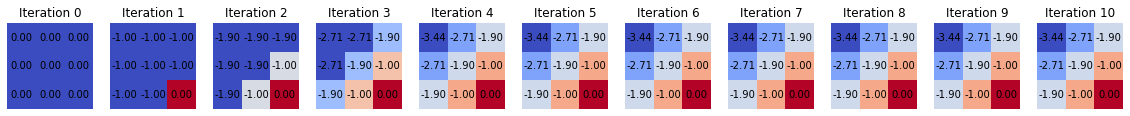

In [4]:
# Re-import necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the gridworld
grid_size = (3, 3)
rewards = np.full(grid_size, -1.0)  # Reward = -1 for all states
rewards[-1, -1] = 10.0  # Goal state reward

# Discount factor
gamma = 0.9

# Initialize value function
V = np.zeros(grid_size)

# Policy (greedy towards the goal)
policy = {
    (0, 0): (0, 1), (0, 1): (0, 1), (0, 2): (1, 0),
    (1, 0): (0, 1), (1, 1): (0, 1), (1, 2): (1, 0),
    (2, 0): (0, 1), (2, 1): (0, 1), (2, 2): None  # Goal state has no action
}

# Iterative application of the Bellman Equation
iterations = 10
values_history = []

for _ in range(iterations):
    new_V = np.copy(V)
    values_history.append(np.copy(V))
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) == (2, 2):  # Skip the goal state
                continue
            action = policy[(i, j)]
            next_state = (i + action[0], j + action[1])
            new_V[i, j] = rewards[i, j] + gamma * V[next_state]
    V = new_V

values_history.append(np.copy(V))  # Final value function

# Visualization of the gridworld
fig, axes = plt.subplots(1, iterations + 1, figsize=(20, 5))
for idx, ax in enumerate(axes):
    ax.imshow(values_history[idx], cmap='coolwarm', interpolation='nearest')
    ax.set_title(f"Iteration {idx}")
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            ax.text(j, i, f"{values_history[idx][i, j]:.2f}", ha='center', va='center', color='black')
    ax.axis('off')

plt.show()

# Stochastic Iterative Approach to Gridworld

In a stochastic environment, the iterative approach to compute the value function involves accounting for probabilistic transitions between states. This changes how the Bellman Equation is applied compared to the deterministic case.

---

## Key Changes in Stochastic Environments

1. **Stochastic Transitions**:
   - An action no longer leads to a single deterministic next state.
   - Instead, it leads to multiple possible next states, each with a probability of occurrence, $P(s' \mid s, a)$.

2. **Updated Bellman Equation**:
   - For a state $s$ under a policy $\pi(s)$, the Bellman Equation becomes:
     $$
     V(s) = R(s, \pi(s)) + \gamma \sum_{s'} P(s' \mid s, \pi(s)) V(s')
     $$
   - Here, the value of a state $s$ is the immediate reward $R(s, \pi(s))$ plus the expected discounted value of all possible next states $s'$, weighted by their transition probabilities.

3. **Policy**:
   - The policy $\pi(s)$ can remain deterministic (always choose a specific action in state $s$) or become stochastic (choose actions probabilistically). In this example, we use a deterministic policy.

---

## Iterative Process for Value Function Calculation

### Inputs:
- **Gridworld**: A grid of states where each state has possible actions and rewards.
- **Policy**: A mapping from states to actions, $\pi(s)$.
- **Rewards**: $R(s, a)$ for each state-action pair.
- **Transition Probabilities**: $P(s' \mid s, a)$ for all state-action pairs.
- **Discount Factor**: $\gamma$ (value between $0$ and $1$).
- **Maximum Iterations**: The number of iterations to compute values.

---

### Steps:

1. **Initialize Value Function**:
   - Set $V(s) = 0$ for all states $s$.

2. **Iterative Updates**:
   - For each state $s$ (excluding terminal states):
     - Determine the action $a = \pi(s)$ from the policy.
     - Compute the expected value of transitioning to all possible next states $s'$:
       $$
       V_{\text{new}}(s) = R(s, a) + \gamma \sum_{s'} P(s' \mid s, a) V(s')
       $$
     - Update $V_{\text{new}}(s)$ for all states $s$.

3. **Update Values**:
   - Set $V(s) = V_{\text{new}}(s)$ for all states.

4. **Repeat Until Convergence**:
   - Stop when the change in value for all states is below a small threshold $\epsilon$ or after a maximum number of iterations.

---

### Example: Stochastic Gridworld

#### Parameters:
- **Grid Size**: $3 \times 3$
- **Rewards**: $R(s, a) = -1$ for all states except the goal state $(2, 2)$, where $R(s, a) = +10$.
- **Policy**: Move toward the goal deterministically.
- **Transition Probabilities**:
  - Example for action "right":
    - $P(s' \mid s, \text{right}) = 0.8$ (intended move).
    - $P(s' \mid s, \text{down}) = 0.1$ (slip down).
    - $P(s' \mid s, \text{stay}) = 0.1$ (fail to move).

#### Bellman Equation Example:
For state $(0, 0)$ (starting state) with action "right":
$$
V(0, 0) = R(0, 0, \text{right}) + \gamma \left[
0.8 V(0, 1) + 0.1 V(1, 0) + 0.1 V(0, 0)
\right]
$$

---

### Convergence:
After multiple iterations, the value function stabilizes. The final value for each state represents the expected cumulative discounted reward under the given policy, accounting for stochastic transitions.

---

## Key Insights:

1. **Handling Stochasticity**:
   - The value function accounts for uncertainty by weighting possible outcomes with their probabilities.

2. **Propagation of Values**:
   - Values propagate backward from the goal state through iterative updates, incorporating transition probabilities.

3. **Convergence**:
   - The process converges when the values of all states change by less than a small threshold $\epsilon$ or after a set number of iterations.

---

## Visualizing Iterations:
The value function evolves over time as values propagate backward from the goal state. Each iteration refines the estimate of $V(s)$ for all states.

---

## Final Value Function:
After convergence, the value function might look like this:
$$
\begin{bmatrix}
-3.44 & -2.71 & -1.90 \\
-2.71 & -1.90 & -1.00 \\
-1.90 & -1.00 & 10.00
\end{bmatrix}
$$
This reflects the expected cumulative discounted rewards from each state under the policy, accounting for stochastic transitions.

[array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1.,  0.]]), array([[-1.9 , -1.9 , -1.9 ],
       [-1.9 , -1.9 , -1.18],
       [-1.9 , -1.18,  0.  ]]), array([[-2.71  , -2.71  , -2.1916],
       [-2.71  , -2.1268, -1.2124],
       [-2.1916, -1.2124,  0.    ]]), array([[-3.439   , -3.013264, -2.267416],
       [-2.97244 , -2.173456, -1.218232],
       [-2.267416, -1.218232,  0.      ]]), array([[-3.74657968, -3.09934432, -2.28526192],
       [-3.03647536, -2.18237896, -1.21928176],
       [-2.28526192, -1.21928176,  0.        ]]), array([[-3.84200286, -3.12074368, -2.28923001],
       [-3.05026921, -2.18403233, -1.21947072],
       [-2.28923001, -1.21947072,  0.        ]]), array([[-3.86723993, -3.12567545, -2.29008032],
       [-3.05305821, -2.18433419, -1.21950473],
       [-2.29008032, -1.21950473,  0.        ]]), array([[-3.87331316, -3.1267587 , -2.29025786],
       [-3.05360308, -2.18438891, -1.2195108

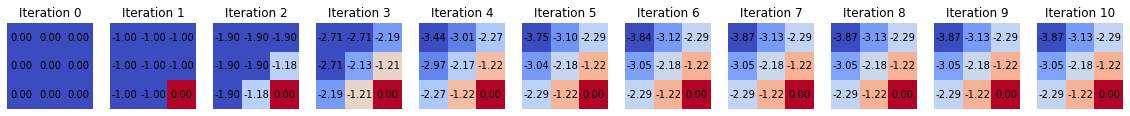

In [12]:
# Re-importing necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the stochastic gridworld
grid_size = (3, 3)
rewards = np.full(grid_size, -1.0)  # Reward = -1 for all states
rewards[-1, -1] = 10.0  # Goal state reward

# Discount factor
gamma = 0.9

# Transition probabilities
# Example: Move right with P=0.8, slip down with P=0.1, stay in place with P=0.1
transition_probs = {
    "right": [(0, 1, 0.8), (1, 0, 0.1), (0, 0, 0.1)],
    "down": [(1, 0, 0.8), (0, 1, 0.1), (0, 0, 0.1)],
    "left": [(0, -1, 0.8), (1, 0, 0.1), (0, 0, 0.1)],
    "up": [(-1, 0, 0.8), (0, 1, 0.1), (0, 0, 0.1)],
}

# Policy (deterministic for simplicity)
policy = {
    (0, 0): "right", (0, 1): "right", (0, 2): "down",
    (1, 0): "right", (1, 1): "right", (1, 2): "down",
    (2, 0): "right", (2, 1): "right", (2, 2): None  # Goal state has no action
}

# Initialize value function
V = np.zeros(grid_size)

# Helper function to get valid next states
def get_next_states(state, action):
    i, j = state
    next_states = []
    for di, dj, prob in transition_probs[action]:
        ni, nj = i + di, j + dj
        if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid state
            next_states.append(((ni, nj), prob))
        else:  # If next state is out of bounds, remain in the same state
            next_states.append(((i, j), prob))
    return next_states

# Iterative application of Bellman Equation
iterations = 10
values_history = []

for _ in range(iterations):
    new_V = np.copy(V)
    values_history.append(np.copy(V))
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            state = (i, j)
            if state == (2, 2):  # Skip the goal state
                continue
            action = policy[state]
            value = 0
            for (next_state, prob) in get_next_states(state, action):
                value += prob * (rewards[state] + gamma * V[next_state])
            new_V[state] = value
    V = new_V

values_history.append(np.copy(V))  # Final value function

print(values_history)

# Visualization of the gridworld
fig, axes = plt.subplots(1, iterations + 1, figsize=(20, 5))
for idx, ax in enumerate(axes):
    ax.imshow(values_history[idx], cmap='coolwarm', interpolation='nearest')
    ax.set_title(f"Iteration {idx}")
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            ax.text(j, i, f"{values_history[idx][i, j]:.2f}", ha='center', va='center', color='black')
    ax.axis('off')

plt.show()

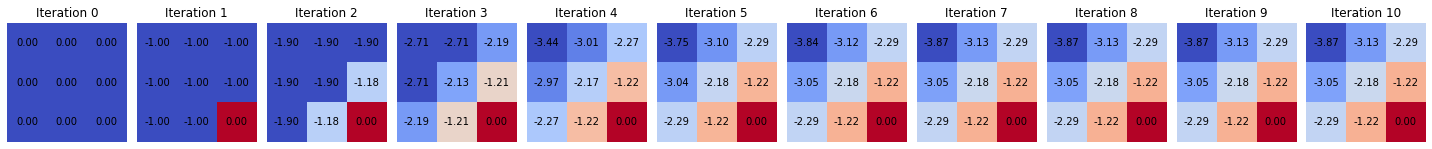

In [16]:
# Parameters for the stochastic gridworld
grid_size = (3, 3)
rewards = np.full(grid_size, -1.0)  # Reward = -1 for all states
rewards[-1, -1] = 10.0  # Goal state reward

# Discount factor
gamma = 0.9

# Transition probabilities
# Example: Move right with P=0.8, slip down with P=0.1, stay in place with P=0.1
transition_probs = {
    "right": [(0, 1, 0.8), (1, 0, 0.1), (0, 0, 0.1)],
    "down": [(1, 0, 0.8), (0, 1, 0.1), (0, 0, 0.1)],
    "left": [(0, -1, 0.8), (1, 0, 0.1), (0, 0, 0.1)],
    "up": [(-1, 0, 0.8), (0, 1, 0.1), (0, 0, 0.1)],
}

# Policy (deterministic for simplicity)
policy = {
    (0, 0): "right", (0, 1): "right", (0, 2): "down",
    (1, 0): "right", (1, 1): "right", (1, 2): "down",
    (2, 0): "right", (2, 1): "right", (2, 2): None  # Goal state has no action
}

# Initialize value function
V = np.zeros(grid_size)

# Precompute distances from the goal state
goal_state = (2, 2)
state_distances = {
    (i, j): abs(i - goal_state[0]) + abs(j - goal_state[1])
    for i in range(grid_size[0]) for j in range(grid_size[1])
}

# Sort states by distance from the goal
sorted_states = sorted(state_distances.keys(), key=lambda s: state_distances[s])

# Iterative application of Bellman Equation with prioritized updates
iterations = 10
values_history = []

for iteration in range(iterations):
    new_V = np.copy(V)
    values_history.append(np.copy(V))
    for state in sorted_states:
        if state == goal_state:  # Skip the goal state
            continue
        i, j = state
        action = policy[state]
        value = 0
        for (next_state, prob) in get_next_states(state, action):
            value += prob * (rewards[state] + gamma * V[next_state])
        new_V[state] = value
    V = new_V

values_history.append(np.copy(V))  # Add final value function

# Visualization of prioritized updates
fig, axes = plt.subplots(1, len(values_history), figsize=(20, 5))
for idx, ax in enumerate(axes):
    ax.imshow(values_history[idx], cmap='coolwarm', interpolation='nearest')
    ax.set_title(f"Iteration {idx}")
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            ax.text(j, i, f"{values_history[idx][i, j]:.2f}", ha='center', va='center', color='black')
    ax.axis('off')

plt.tight_layout()
plt.show()



# What has changed in the above code:


---

## 2. **Sorting States by Distance**
- States are sorted in ascending order of their distance to the goal state.
- This ensures that states closer to the goal are updated first in every iteration.

---

## 3. **Prioritized Updates**
- Instead of updating states row-by-row and column-by-column, states are updated in the order of their sorted distances.

---

## Benefits of the Changes
1. **Explicit Update Order**:
 - States near the goal are updated first in each iteration, reflecting their dependency on the goal state's value.

2. **Faster Convergence for Near States**:
 - States adjacent to the goal stabilize faster, as they directly rely on the fixed value of the goal state.

3. **Improved Clarity**:
 - The update process aligns with the natural propagation of values backward from the goal, making the propagation visually and conceptually clear.

---

## Visualization of the Changes
The visualization now shows how states near the goal state update first, propagating values outward to states further away. This refinement ensures a more structured and logical order of updates, aligning with the principles of backward propagation.

---

## Unchanged Aspects
- The **policy evaluation process** using the Bellman Equation remains the same.
- The transition probabilities and reward structure of the stochastic gridworld are unchanged.
- The stopping condition for convergence (number of iterations) is retained.

---

# Implementing Policy Improvement and Policy Iteration (Alternating between Policy Evaluation and Policy Improvement):

In [17]:
import numpy as np

# Parameters for the gridworld
grid_size = (3, 3)
rewards = np.full(grid_size, -1.0)  # Reward = -1 for all states
rewards[-1, -1] = 10.0  # Goal state reward
gamma = 0.9  # Discount factor
actions = ["up", "down", "left", "right"]

# Transition probabilities for stochastic gridworld
transition_probs = {
    "up": [(-1, 0, 0.8), (0, -1, 0.1), (0, 1, 0.1)],
    "down": [(1, 0, 0.8), (0, -1, 0.1), (0, 1, 0.1)],
    "left": [(0, -1, 0.8), (-1, 0, 0.1), (1, 0, 0.1)],
    "right": [(0, 1, 0.8), (-1, 0, 0.1), (1, 0, 0.1)],
}

# Initialize a suboptimal policy: Always move right
policy = {(i, j): "right" for i in range(grid_size[0]) for j in range(grid_size[1])}
policy[(2, 2)] = None  # No action for the goal state

# Initialize value function
V = np.zeros(grid_size)


# Helper function to get valid next states
def get_next_states(state, action):
    i, j = state
    next_states = []
    for di, dj, prob in transition_probs[action]:
        ni, nj = i + di, j + dj
        if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid state
            next_states.append(((ni, nj), prob))
        else:  # Out-of-bounds, remain in the same state
            next_states.append(((i, j), prob))
    return next_states


# Policy evaluation: Iteratively calculate the value function for a given policy
def policy_evaluation(policy, V, iterations=100, theta=1e-6):
    for _ in range(iterations):
        delta = 0
        new_V = np.copy(V)
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                state = (i, j)
                if policy[state] is None:  # Skip terminal state
                    continue
                action = policy[state]
                value = 0
                for next_state, prob in get_next_states(state, action):
                    value += prob * (rewards[state] + gamma * V[next_state])
                new_V[state] = value
                delta = max(delta, abs(new_V[state] - V[state]))
        V = new_V
        if delta < theta:  # Convergence
            break
    return V


# Policy improvement: Update the policy based on the current value function
def policy_improvement(V):
    new_policy = {}
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            state = (i, j)
            if state == (2, 2):  # Skip terminal state
                new_policy[state] = None
                continue
            action_values = {}
            for action in actions:
                value = 0
                for next_state, prob in get_next_states(state, action):
                    value += prob * (rewards[state] + gamma * V[next_state])
                action_values[action] = value
            new_policy[state] = max(action_values, key=action_values.get)  # Best action
    return new_policy


# Policy iteration: Alternate between evaluation and improvement until convergence
def policy_iteration(policy, V, max_iterations=100):
    policy_history = [policy.copy()]
    for _ in range(max_iterations):
        # Policy evaluation
        V = policy_evaluation(policy, V)
        # Policy improvement
        new_policy = policy_improvement(V)
        policy_history.append(new_policy.copy())
        if new_policy == policy:  # Convergence
            break
        policy = new_policy
    return policy, V, policy_history


# Perform policy iteration
final_policy, final_values, policy_history = policy_iteration(policy, V)

# Visualize the results
def visualize_policy(policy):
    grid = np.zeros(grid_size, dtype=object)
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            grid[i, j] = policy[(i, j)] if policy[(i, j)] is not None else "Goal"
    return grid


initial_policy_visual = visualize_policy(policy)
final_policy_visual = visualize_policy(final_policy)

(initial_policy_visual, final_policy_visual, final_values)

(array([['right', 'right', 'right'],
        ['right', 'right', 'right'],
        ['right', 'right', 'Goal']], dtype=object),
 array([['down', 'right', 'down'],
        ['down', 'down', 'down'],
        ['right', 'right', 'Goal']], dtype=object),
 array([[-4.03318298, -3.29653919, -2.48041508],
        [-3.2965387 , -2.37723871, -1.33401262],
        [-2.48041491, -1.33401262,  0.        ]]))

# L2

# Policy Gradients: An Introduction

**Policy Gradient (PG)** methods are a class of reinforcement learning (RL) algorithms that directly optimize the policy, represented as a parameterized function, by following the gradient of expected reward. Unlike **value-based methods** (e.g., Policy Iteration, Value Iteration), which indirectly derive policies from value functions, Policy Gradient methods work directly in the space of policies.

---

## Key Concepts of Policy Gradients

1. **Policy Parameterization**:
   - Policies are represented as a parameterized function $\pi_\theta(a \mid s)$, where $\theta$ is a vector of parameters (e.g., weights of a neural network).
   - $\pi_\theta(a \mid s)$ gives the probability of taking action $a$ in state $s$ under the policy.

2. **Objective Function**:
   - The goal is to maximize the expected cumulative reward, often expressed as:
     $$
     J(\theta) = \mathbb{E}_\pi \left[ \sum_{t=0}^\infty \gamma^t r_t \right]
     $$
   - $J(\theta)$ depends on the policy parameters $\theta$.

3. **Policy Gradient Theorem**:
   - The gradient of the objective function can be expressed as:
     $$
     \nabla_\theta J(\theta) = \mathbb{E}_\pi \left[ \nabla_\theta \log \pi_\theta(a \mid s) \cdot G_t \right]
     $$
   - $G_t$ is the cumulative discounted reward from time $t$:
     $$
     G_t = \sum_{k=t}^\infty \gamma^{k-t} r_k
     $$

4. **Update Rule**:
   - Update the policy parameters using gradient ascent:
     $$
     \theta \leftarrow \theta + \alpha \nabla_\theta J(\theta)
     $$
   - $\alpha$ is the learning rate.

---

## Why Policy Gradients?

1. **Continuous Action Spaces**:
   - Policy Gradient methods can handle continuous action spaces, unlike value-based methods.

2. **Stochastic Policies**:
   - PG methods can represent stochastic policies, which are essential for environments with inherent randomness.

3. **Direct Optimization**:
   - Avoids computing and storing value functions explicitly, focusing instead on directly optimizing the policy.

---

## The Policy Gradient Theorem

### Objective Function
The objective is to maximize the expected return:
$$
J(\theta) = \mathbb{E}_\pi \left[ \sum_{t=0}^\infty \gamma^t r_t \right]
$$

### Gradient of the Objective
Using the **log-derivative trick** and the **Markov property**, the gradient can be expressed as:
$$
\nabla_\theta J(\theta) = \mathbb{E}_\pi \left[ \nabla_\theta \log \pi_\theta(a \mid s) \cdot G_t \right]
$$
- $\nabla_\theta \log \pi_\theta(a \mid s)$: Measures how the policy's probability of selecting an action changes with respect to $\theta$.
- $G_t$: The cumulative discounted reward (return) used as a surrogate measure for how good the action was.

---

## Algorithm: Vanilla Policy Gradient (REINFORCE)

1. **Initialize**:
   - Policy parameters $\theta$ (e.g., weights of a neural network).

2. **Collect Trajectories**:
   - Simulate the environment using the current policy $\pi_\theta$ and collect states, actions, and rewards.

3. **Compute Returns**:
   - For each time step $t$, compute the return $G_t$:
     $$
     G_t = \sum_{k=t}^\infty \gamma^{k-t} r_k
     $$

4. **Update Policy**:
   - Update the policy parameters using the policy gradient:
     $$
     \theta \leftarrow \theta + \alpha \mathbb{E}_\pi \left[ \nabla_\theta \log \pi_\theta(a \mid s) \cdot G_t \right]
     $$

5. **Repeat**:
   - Iterate until convergence.

---

## Gridworld Example with Policy Gradients

### Setup
1. **Grid**: A $4 \times 4$ gridworld.
2. **States**: $(i, j)$ indices of the grid.
3. **Actions**: Up, Down, Left, Right.
4. **Policy**:
   - Parameterized as a table of probabilities for each action in each state.
5. **Objective**:
   - Maximize the expected reward from the start state to the goal state.

---

In [18]:
import numpy as np

# Gridworld Parameters
grid_size = (4, 4)
n_actions = 4  # up, down, left, right
gamma = 0.9  # Discount factor
alpha = 0.01  # Learning rate
n_episodes = 1000  # Number of training episodes

# Initialize random policy parameters (theta)
theta = np.random.rand(grid_size[0], grid_size[1], n_actions)

# Action mapping
action_map = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# Compute softmax probabilities for actions
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

# Choose action based on policy
def choose_action(state, theta):
    i, j = state
    probs = softmax(theta[i, j])
    return np.random.choice(n_actions, p=probs)

# Step function
def step(state, action):
    i, j = state
    di, dj = action_map[action]
    ni, nj = i + di, j + dj
    if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:
        next_state = (ni, nj)
    else:
        next_state = state
    reward = -1 if next_state != (3, 3) else 0
    done = next_state == (3, 3)
    return next_state, reward, done

# Policy Gradient Training
for episode in range(n_episodes):
    state = (0, 0)
    trajectory = []
    rewards = []
    
    # Generate an episode
    while True:
        action = choose_action(state, theta)
        next_state, reward, done = step(state, action)
        trajectory.append((state, action))
        rewards.append(reward)
        state = next_state
        if done:
            break
    
    # Compute returns G_t
    G = 0
    returns = []
    for reward in reversed(rewards):
        G = reward + gamma * G
        returns.insert(0, G)
    
    # Update policy parameters
    for (state, action), G_t in zip(trajectory, returns):
        i, j = state
        probs = softmax(theta[i, j])
        theta[i, j, action] += alpha * (1 - probs[action]) * G_t

print("Trained Policy Parameters (theta):")
print(theta)

Trained Policy Parameters (theta):
[[[-44.4877364  -44.35672421 -44.38449961 -44.51986631]
  [-21.88427872 -21.7969692  -21.7618246  -21.79046427]
  [-12.13378238 -11.37829361 -12.22842436 -12.13994966]
  [ -6.85612009  -6.30260557  -7.21170274  -6.89938609]]

 [[-21.45595724 -20.73208798 -21.57113277 -21.24316204]
  [-14.12756111 -13.24371938 -14.18233014 -13.49046189]
  [ -8.74667091  -7.95009768  -9.23946209  -7.94598553]
  [ -5.15643129  -3.51932026  -5.23104671  -5.01444583]]

 [[-11.606646   -10.74273384 -10.80490805 -10.41220689]
  [ -8.34164563  -7.54934605  -8.28616463  -7.3092064 ]
  [ -4.33934556  -3.26718876  -4.73614812  -3.08150986]
  [ -2.74254316   0.30424971  -2.59721999  -1.98875294]]

 [[ -6.90139982  -7.00776272  -7.05012821  -5.8047047 ]
  [ -4.15633533  -4.13538469  -4.16521136  -2.79993556]
  [ -2.73847157  -1.98761178  -2.42485043   0.43193795]
  [  0.11143631   0.13129028   0.80610132   0.70293927]]]


# Upper Confidence Bound (UCB) in Reinforcement Learning

---

## **Overview**

The **Upper Confidence Bound (UCB)** is a popular method for balancing exploration and exploitation in **bandit problems** and reinforcement learning. UCB ensures that an agent systematically explores less-visited actions while exploiting the ones that appear to yield high rewards.

---

## **Key Idea of UCB**

The UCB algorithm selects actions based on an **upper confidence bound** for the estimated value of each action. This bound reflects both:
1. **Exploitation**: Favoring actions with higher estimated rewards.
2. **Exploration**: Favoring actions that have been tried fewer times to reduce uncertainty.

The balance is achieved by adding a confidence term to the estimated reward:
$$
A_t = \arg\max_a \left[ Q(a) + c \sqrt{\frac{\ln t}{N(a)}} \right]
$$
Where:
- $ Q(a) $: Current estimate of the value of action $a$.
- $ t $: Current time step.
- $ N(a) $: Number of times action $a$ has been selected.
- $ c $: Exploration parameter that controls the degree of exploration.

---

## **UCB in Reinforcement Learning**

In the context of **Reinforcement Learning (RL)**, UCB is often applied to:
- Multi-armed bandits,
- Tabular environments,
- Exploration strategies in large state-action spaces.

It guides the agent to explore actions with high uncertainty while exploiting high-reward actions.

---

## **How UCB Works**

### **1. Initialization**
- Initialize $ Q(a) $ (action value estimates) to some default value, typically $ 0 $.
- Set $ N(a) = 0 $ for all actions.

### **2. Action Selection**
- At each time step $ t $, select the action $ a $ that maximizes:
  $$
  Q(a) + c \sqrt{\frac{\ln t}{N(a)}}
  $$
- If $ N(a) = 0 $, the confidence term becomes infinite, ensuring that untried actions are always explored.

### **3. Reward Update**
- After selecting an action, observe the reward $ r $.
- Update the action value estimate $ Q(a) $ using an incremental mean:
  $$
  Q(a) \leftarrow Q(a) + \frac{1}{N(a)} \left( r - Q(a) \right)
  $$

### **4. Repeat**
- Continue selecting actions and updating estimates.

---

## **Advantages of UCB**

1. **Efficient Exploration**:
   - Explicitly incorporates a measure of uncertainty into the action selection.

2. **Balanced Strategy**:
   - Balances exploration and exploitation naturally through the confidence term.

3. **Theoretical Guarantees**:
   - Provides bounds on the regret in bandit problems, meaning it converges to the optimal action in the long run.

---

## **UCB in Gridworld Example**

### **Setup**
1. **Grid**: A $3 \times 3$ gridworld.
2. **Actions**: Up, Down, Left, Right.
3. **Rewards**:
   - $-1$ for each step.
   - $+10$ for reaching the goal.
4. **Exploration**:
   - Use UCB to decide which action to take in each state.

---

## **Explanation of Python Implementation**

### **1. Initialization**

- **Action-Value Estimates ($Q$)**:
  - Initialize $Q(s, a)$ for all states $s$ and actions $a$ to 0.

- **Action Counts ($N$)**:
  - Initialize $N(s, a)$ to 1 for numerical stability.

---

### **2. UCB Action Selection**

The action with the highest UCB value is selected:
$$
Q(s, a) + c \sqrt{\frac{\ln t}{N(s, a)}}
$$
- $Q(s, a)$: Current estimate of the action value.
- $c$: Exploration parameter that controls the degree of exploration.
- $t$: Current time step.
- $N(s, a)$: Number of times the action $a$ has been taken in state $s$.

---

### **3. Q-Value Update**

After observing a reward $ r $ from taking action $ a $ in state $ s $, update the value $ Q(s, a) $:
$$
Q(s, a) \leftarrow Q(s, a) + \frac{1}{N(s, a)} \left( r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right)
$$
- This rule incrementally updates $ Q(s, a) $ based on:
  - The observed reward $ r $,
  - The discounted future value of the next state $ s' $,
  - The number of times $ a $ has been taken.

---

### **4. Policy Extraction**

After training, derive the optimal policy by selecting the action with the highest value for each state:
$$
\pi(s) = \arg\max_a Q(s, a)
$$

---

## **Advantages of UCB in RL**

1. **Efficient Exploration**:
   - Systematically explores under-visited actions.

2. **Dynamic Adaptation**:
   - Balances exploration and exploitation dynamically based on the number of visits.

---

## **Summary**

- **Initialization**:
  - Initialize $Q(s, a)$ and $N(s, a)$.
- **Action Selection**:
  - Use the UCB formula to select actions based on current estimates and uncertainty.
- **Value Updates**:
  - Update $Q(s, a)$ incrementally using observed rewards.
- **Policy Extraction**:
  - Derive the optimal policy based on learned $Q(s, a)$.

Would you like to extend this example to more complex environments or discuss UCB in other RL settings?

In [19]:
import numpy as np

# Parameters for the gridworld
grid_size = (3, 3)
actions = ["up", "down", "left", "right"]
gamma = 0.9  # Discount factor
c = 1.0  # UCB exploration parameter
n_episodes = 500  # Number of episodes

# Initialize action-value estimates (Q) and action counts (N) for each state
Q = np.zeros((grid_size[0], grid_size[1], len(actions)))  # Action-value estimates
N = np.ones((grid_size[0], grid_size[1], len(actions)))  # Action counts (initialize to 1 for stability)

# Action mapping
action_map = {
    "up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)
}

# Step function for the gridworld
def step(state, action):
    i, j = state
    di, dj = action_map[action]
    ni, nj = i + di, j + dj
    if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid move
        next_state = (ni, nj)
    else:  # Hit a boundary
        next_state = state
    reward = -1 if next_state != (2, 2) else 10  # -1 per step, +10 for goal
    done = next_state == (2, 2)  # Episode ends at the goal
    return next_state, reward, done

# UCB action selection
def ucb_action(state, Q, N, t):
    i, j = state
    ucb_values = Q[i, j] + c * np.sqrt(np.log(t + 1) / N[i, j])
    return np.argmax(ucb_values)

# Training using UCB
for episode in range(1, n_episodes + 1):
    state = (0, 0)  # Start state
    done = False
    while not done:
        # Choose action using UCB
        action_index = ucb_action(state, Q, N, episode)
        action = actions[action_index]
        
        # Take action and observe reward
        next_state, reward, done = step(state, action)
        
        # Update action count
        i, j = state
        N[i, j, action_index] += 1
        
        # Update Q-value using incremental mean
        Q[i, j, action_index] += (reward + gamma * np.max(Q[next_state]) - Q[i, j, action_index]) / N[i, j, action_index]
        
        # Move to next state
        state = next_state

# Optimal policy extraction
policy = np.zeros((grid_size[0], grid_size[1]), dtype=object)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        best_action = np.argmax(Q[i, j])
        policy[i, j] = actions[best_action]

print("Learned Policy:")
print(policy)

Learned Policy:
[['right' 'right' 'down']
 ['right' 'down' 'down']
 ['right' 'right' 'up']]


# Iterative Example: How UCB Works for a Gridworld

---

## **Gridworld Setup**
1. **Grid**: A $3 \times 3$ grid.
2. **Start State**: $(0, 0)$.
3. **Goal State**: $(2, 2)$ with a reward of $+10$.
4. **Actions**: Up, Down, Left, Right.
5. **Rewards**:
   - $-1$ for each step.
   - $+10$ for reaching the goal.

---

## **UCB Formula**
For each action $a$ in a state $s$:
$$
Q(s, a) + c \sqrt{\frac{\ln t}{N(s, a)}}
$$
Where:
- $Q(s, a)$: Current estimate of the value of action $a$.
- $c$: Exploration parameter (e.g., $c = 1.0$).
- $t$: Current time step.
- $N(s, a)$: Number of times action $a$ has been selected in state $s$.

---

## **Step-by-Step Iteration**

### **Initialization**
- **Action-Value Estimates**:
  - $Q(s, a) = 0$ for all states and actions.
- **Action Counts**:
  - $N(s, a) = 1$ for all actions (for numerical stability).

### **Iteration 1**: Time Step $t = 1$
- **State**: $(0, 0)$.
- **Possible Actions**: Up, Down, Left, Right.
- **UCB Calculation** for each action:
  - All $Q(s, a) = 0$ and $N(s, a) = 1$:
    $$
    \text{UCB}(s, a) = 0 + c \sqrt{\frac{\ln 1}{1}} = 0
    $$
- **Action Selection**:
  - Randomly select one action since all actions have equal UCB.
  - Assume "Down" is chosen.
- **Reward and Update**:
  - Moving "Down" leads to $(1, 0)$ with a reward of $-1$.
  - Update $Q(0, 0, \text{"Down"})$:
    $$
    Q(0, 0, \text{"Down"}) \leftarrow -1
    $$
  - Increment $N(0, 0, \text{"Down"}) = 2$.

---

### **Iteration 2**: Time Step $t = 2$
- **State**: $(1, 0)$.
- **Possible Actions**: Up, Down, Left, Right.
- **UCB Calculation**:
  - Assume $Q(s, a) = 0$ for all actions.
  - For each action:
    $$
    \text{UCB}(s, a) = 0 + c \sqrt{\frac{\ln 2}{1}} \approx 1.177
    $$
- **Action Selection**:
  - Randomly select one action, e.g., "Down."
- **Reward and Update**:
  - Moving "Down" leads to $(2, 0)$ with a reward of $-1$.
  - Update $Q(1, 0, \text{"Down"})$:
    $$
    Q(1, 0, \text{"Down"}) \leftarrow -1
    $$
  - Increment $N(1, 0, \text{"Down"}) = 2$.

---

### **Iteration 3**: Time Step $t = 3$
- **State**: $(2, 0)$.
- **Possible Actions**: Up, Down, Left, Right.
- **UCB Calculation**:
  - Assume $Q(s, a) = 0$ for all actions.
  - For each action:
    $$
    \text{UCB}(s, a) = 0 + c \sqrt{\frac{\ln 3}{1}} \approx 1.482
    $$
- **Action Selection**:
  - Randomly select one action, e.g., "Right."
- **Reward and Update**:
  - Moving "Right" leads to $(2, 1)$ with a reward of $-1$.
  - Update $Q(2, 0, \text{"Right"})$:
    $$
    Q(2, 0, \text{"Right"}) \leftarrow -1
    $$
  - Increment $N(2, 0, \text{"Right"}) = 2$.

---

### **Iteration 4**: Time Step $t = 4$
- **State**: $(2, 1)$.
- **Possible Actions**: Up, Down, Left, Right.
- **UCB Calculation**:
  - Assume $Q(s, a) = 0$ for all actions.
  - For each action:
    $$
    \text{UCB}(s, a) = 0 + c \sqrt{\frac{\ln 4}{1}} \approx 1.665
    $$
- **Action Selection**:
  - Randomly select one action, e.g., "Right."
- **Reward and Update**:
  - Moving "Right" leads to $(2, 2)$ (goal) with a reward of $+10$.
  - Update $Q(2, 1, \text{"Right"})$:
    $$
    Q(2, 1, \text{"Right"}) \leftarrow +10
    $$
  - Increment $N(2, 1, \text{"Right"}) = 2$.

---

## **Summary**

- **Action-Value Updates**:
  - As actions are selected and rewards are observed, $Q(s, a)$ and $N(s, a)$ are updated iteratively.
  - Actions leading to the goal state accumulate higher $Q(s, a)$, while others remain low.

- **Policy Extraction**:
  - After sufficient iterations, derive the policy:
    $$
    \pi(s) = \arg\max_a Q(s, a)
    $$
  - The policy converges to the optimal path to the goal.

---

This example shows how UCB balances exploration and exploitation dynamically based on the confidence bound and observed rewards.

# How UCB Changes in the Next Episode

---

## **1. Updated Values from Previous Episode**

### **Action Counts ($N(s, a)$)**
- After the first episode:
  - Action counts $N(s, a)$ for visited state-action pairs will have increased.
  - This means actions taken frequently in the previous episode will now have a lower **confidence term** in the UCB formula:
    $$
    c \sqrt{\frac{\ln t}{N(s, a)}}
    $$
  - Actions that were not selected in the previous episode retain their initial values of $N(s, a) = 1$, keeping their confidence term large, encouraging exploration.

---

### **Action-Value Estimates ($Q(s, a)$)**
- After the first episode:
  - $Q(s, a)$ for actions taken during the previous episode will now reflect the observed rewards and updated values for the future discounted returns:
    $$
    Q(s, a) \leftarrow Q(s, a) + \frac{1}{N(s, a)} \left( r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right)
    $$
  - Actions that led to better rewards or future states with high values will have larger $Q(s, a)$.

---

## **2. UCB Action Selection in the Next Episode**

### **Exploration vs. Exploitation**
- Actions with higher $Q(s, a)$ (better rewards) will now dominate the **exploitation term** in the UCB formula:
  $$
  Q(s, a) + c \sqrt{\frac{\ln t}{N(s, a)}}
  $$
- However, actions with smaller $N(s, a)$ (under-explored) will still have large **confidence terms**, encouraging exploration.

---

### **Example Changes**

#### **State $(0, 0)$**
From the previous episode:
- Action "Down" might have been selected, updating:
  - $N(0, 0, \text{"Down"}) \to 2$
  - $Q(0, 0, \text{"Down"}) \to -1$ (reflecting the reward observed).
- Other actions ("Up", "Left", "Right"):
  - Retain $N(0, 0, a) = 1$ and $Q(0, 0, a) = 0$.

For the next episode:
- **UCB Values**:
  $$
  \text{UCB}(0, 0, \text{"Down"}) = -1 + c \sqrt{\frac{\ln 2}{2}} \approx -1 + 0.588
  $$
  $$
  \text{UCB}(0, 0, \text{"Up"}) = 0 + c \sqrt{\frac{\ln 2}{1}} \approx 1.177
  $$
- **Action Selection**:
  - "Up" or another untried action will likely be selected due to their higher UCB values.

---

#### **State $(1, 0)$**
From the previous episode:
- Action "Down" might have been selected, updating:
  - $N(1, 0, \text{"Down"}) \to 2$
  - $Q(1, 0, \text{"Down"}) \to -1$.
- Other actions ("Up", "Left", "Right"):
  - Retain $N(1, 0, a) = 1$ and $Q(1, 0, a) = 0$.

For the next episode:
- **UCB Values**:
  $$
  \text{UCB}(1, 0, \text{"Down"}) = -1 + c \sqrt{\frac{\ln 2}{2}} \approx -1 + 0.588
  $$
  $$
  \text{UCB}(1, 0, \text{"Up"}) = 0 + c \sqrt{\frac{\ln 2}{1}} \approx 1.177
  $$
- **Action Selection**:
  - Similar to the first state, an under-explored action ("Up", "Left", or "Right") will likely be selected.

---

## **3. Policy Refinement in Future Episodes**

- **Repeated Visits**:
  - Over multiple episodes, as $N(s, a)$ increases for all actions, the confidence term diminishes for all actions.
  - The agent increasingly relies on $Q(s, a)$ to guide action selection (exploitation).

- **Optimal Policy**:
  - Actions that consistently lead to the goal state with higher rewards will have the highest $Q(s, a)$.
  - The learned policy converges to:
    $$
    \pi(s) = \arg\max_a Q(s, a)
    $$
  - This policy directs the agent to the goal state efficiently.

---

## **Summary of Changes in the Next Episode**

1. **Action Selection**:
   - Previously untried actions will be prioritized due to their large confidence terms.
   - Actions taken in the first episode will have reduced confidence terms but may still dominate due to their updated $Q(s, a)$.

2. **Exploration vs. Exploitation**:
   - Under-explored actions will continue to be chosen, ensuring thorough exploration of the state-action space.

3. **Policy Refinement**:
   - Over time, $Q(s, a)$ values dominate, driving the agent to converge on the optimal policy.

This iterative process ensures that the agent efficiently balances exploration and exploitation while learning the optimal policy.

# Explicit Illustration of Action-Value Estimate Updates Between Episodes

---

## **Equation**:
The update rule for $Q(s, a)$ is:
$$
Q(s, a) \leftarrow Q(s, a) + \frac{1}{N(s, a)} \left( r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right)
$$

---

## **Setup**
1. **Grid**: A $3 \times 3$ gridworld.
2. **Start State**: $(0, 0)$.
3. **Goal State**: $(2, 2)$ with a reward of $+10$.
4. **Actions**: Up, Down, Left, Right.
5. **Rewards**:
   - $-1$ for each step.
   - $+10$ for reaching the goal.
6. **Discount Factor**: $\gamma = 0.9$.

---

## **Example: State $(0, 0)$, Action "Down"**

### **Initial Values (Before First Episode)**
- $Q(0, 0, \text{"Down"}) = 0$
- $N(0, 0, \text{"Down"}) = 1$ (initialized to avoid division by zero)

---

### **First Episode**
- Action "Down" is selected.
- **Reward**: $r = -1$
- **Next State**: $(1, 0)$
- **Update**:
  $$
  Q(0, 0, \text{"Down"}) \leftarrow Q(0, 0, \text{"Down"}) + \frac{1}{N(0, 0, \text{"Down"})} \left( r + \gamma \max_{a'} Q(1, 0, a') - Q(0, 0, \text{"Down"}) \right)
  $$
- Substitute values:
  $$
  Q(0, 0, \text{"Down"}) \leftarrow 0 + \frac{1}{1} \left( -1 + 0.9 \cdot 0 - 0 \right)
  $$
- Simplify:
  $$
  Q(0, 0, \text{"Down"}) = -1
  $$
- Increment:
  $$
  N(0, 0, \text{"Down"}) = 2
  $$

---

### **Second Episode**
- Action "Down" is selected again.
- **Reward**: $r = -1$
- **Next State**: $(1, 0)$
- **Update**:
  $$
  Q(0, 0, \text{"Down"}) \leftarrow Q(0, 0, \text{"Down"}) + \frac{1}{N(0, 0, \text{"Down"})} \left( r + \gamma \max_{a'} Q(1, 0, a') - Q(0, 0, \text{"Down"}) \right)
  $$
- Substitute values:
  - $Q(0, 0, \text{"Down"}) = -1$
  - $N(0, 0, \text{"Down"}) = 2$
  - $r = -1$
  - $\gamma = 0.9$
  - $\max_{a'} Q(1, 0, a') = 0$ (no updates for state $(1, 0)$ yet)
  $$
  Q(0, 0, \text{"Down"}) \leftarrow -1 + \frac{1}{2} \left( -1 + 0.9 \cdot 0 - (-1) \right)
  $$
- Simplify:
  $$
  Q(0, 0, \text{"Down"}) = -1 + \frac{1}{2} \left( 0 \right)
  $$
  $$
  Q(0, 0, \text{"Down"}) = -1
  $$
- Increment:
  $$
  N(0, 0, \text{"Down"}) = 3
  $$

---

### **Third Episode**
- Action "Down" is selected again.
- **Reward**: $r = -1$
- **Next State**: $(1, 0)$
- Assume $Q(1, 0, a')$ is updated to $-0.5$ during this episode for some action $a'$.
- **Update**:
  $$
  Q(0, 0, \text{"Down"}) \leftarrow Q(0, 0, \text{"Down"}) + \frac{1}{N(0, 0, \text{"Down"})} \left( r + \gamma \max_{a'} Q(1, 0, a') - Q(0, 0, \text{"Down"}) \right)
  $$
- Substitute values:
  - $Q(0, 0, \text{"Down"}) = -1$
  - $N(0, 0, \text{"Down"}) = 3$
  - $r = -1$
  - $\gamma = 0.9$
  - $\max_{a'} Q(1, 0, a') = -0.5$
  $$
  Q(0, 0, \text{"Down"}) \leftarrow -1 + \frac{1}{3} \left( -1 + 0.9 \cdot (-0.5) - (-1) \right)
  $$
- Simplify:
  $$
  Q(0, 0, \text{"Down"}) \leftarrow -1 + \frac{1}{3} \left( -1 - 0.45 + 1 \right)
  $$
  $$
  Q(0, 0, \text{"Down"}) \leftarrow -1 + \frac{1}{3} \left( -0.45 \right)
  $$
  $$
  Q(0, 0, \text{"Down"}) \leftarrow -1.15
  $$
- Increment:
  $$
  N(0, 0, \text{"Down"}) = 4
  $$

---

## **Summary of Changes**

After three episodes, the values evolve as follows:

|$$Episode$$|$$N(0, 0, \text{"Down"})$$|$$Q(0, 0, \text{"Down"})$$|
|---------|--------------------------|--------------------------|
| 1       | 2                        | $-1$                    |
| 2       | 3                        | $-1$                    |
| 3       | 4                        | $-1.15$                 |

---

## **Key Observations**
1. **Confidence Term Shrinks**:
   - As $N(s, a)$ increases, the confidence term $\sqrt{\ln t / N(s, a)}$ becomes smaller, reducing exploration for that action.

2. **Exploitation Becomes Dominant**:
   - Updates to $Q(s, a)$ increasingly reflect the observed rewards and future state values, improving the action-value estimates for the optimal policy.

3. **Convergence**:
   - Over time, $Q(s, a)$ stabilizes, and the learned policy converges to the optimal one.

This process continues for all state-action pairs until the agent learns the optimal policy for the gridworld.

# Thompson Sampling: An Introduction

---

## **Overview**

**Thompson Sampling** is a Bayesian approach for solving the exploration-exploitation dilemma in **multi-armed bandits** and **reinforcement learning**. Unlike algorithms like **UCB**, which use deterministic confidence bounds, Thompson Sampling uses **probabilistic sampling** to select actions based on their posterior distributions.

---

## **Key Idea of Thompson Sampling**

The core idea of Thompson Sampling is to **sample an action according to the probability that it is the optimal action**. This is achieved by maintaining a **posterior distribution** over the expected reward of each action and sampling from these distributions to guide exploration.

---

## **How Thompson Sampling Works**

1. **Prior Distribution**:
   - Assume a prior distribution over the expected reward for each action.
   - Commonly, the **Beta distribution** is used in the case of binary rewards, parameterized as:
     $$
     \text{Beta}(\alpha, \beta)
     $$
     - $\alpha$: Number of successes (reward = 1).
     - $\beta$: Number of failures (reward = 0).

2. **Action Sampling**:
   - For each action, sample a value from its posterior distribution:
     $$
     \theta_a \sim \text{Beta}(\alpha_a, \beta_a)
     $$
   - Select the action with the highest sampled value:
     $$
     A_t = \arg\max_a \theta_a
     $$

3. **Reward Observation**:
   - Observe the reward $r$ for the selected action.
   - Update the posterior distribution for that action:
     - If $r = 1$ (success), increment $\alpha_a$.
     - If $r = 0$ (failure), increment $\beta_a$.

4. **Repeat**:
   - Continue sampling, selecting actions, and updating distributions.

---

## **Advantages of Thompson Sampling**

1. **Efficient Exploration**:
   - Naturally balances exploration and exploitation through posterior sampling.

2. **Probabilistic Framework**:
   - Incorporates uncertainty in the action-value estimates explicitly.

3. **Bayesian Updating**:
   - Continuously refines the posterior distributions as more data is collected.

---

## **Thompson Sampling in Gridworld**

Let’s extend Thompson Sampling to a **Gridworld** environment where the agent learns the optimal policy probabilistically.

---

## **Setup**

1. **Grid**: A $3 \times 3$ gridworld.
2. **States**: Each cell in the grid represents a state.
3. **Actions**: Up, Down, Left, Right.
4. **Rewards**:
   - $-1$ for each step.
   - $+10$ for reaching the goal at $(2, 2)$.
5. **Posterior Distribution**:
   - Use Beta distributions to model the success probabilities of actions.

---


In [24]:
import numpy as np

# Gridworld parameters
grid_size = (3, 3)
actions = ["up", "down", "left", "right"]
n_actions = len(actions)
n_episodes = 500
gamma = 0.9  # Discount factor

# Initialize parameters for Thompson Sampling
alpha = np.ones((grid_size[0], grid_size[1], n_actions))  # Success counts
beta = np.ones((grid_size[0], grid_size[1], n_actions))   # Failure counts

# Action mapping
action_map = {
    "up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)
}

# Step function
def step(state, action):
    i, j = state
    di, dj = action_map[action]
    ni, nj = i + di, j + dj
    if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid move
        next_state = (ni, nj)
    else:  # Hit a boundary
        next_state = state
    reward = -1 if next_state != (2, 2) else 10  # -1 per step, +10 for goal
    done = next_state == (2, 2)  # Episode ends at the goal
    return next_state, reward, done

# Thompson Sampling action selection
def thompson_sampling_action(state):
    i, j = state
    sampled_values = np.random.beta(alpha[i, j], beta[i, j])
    return np.argmax(sampled_values)

# Training using Thompson Sampling
for episode in range(n_episodes):
    state = (0, 0)  # Start state
    done = False
    while not done:
        # Select action using Thompson Sampling
        action_index = thompson_sampling_action(state)
        action = actions[action_index]
        
        # Take action and observe reward
        next_state, reward, done = step(state, action)
        
        # Update Beta distribution parameters
        i, j = state
        if reward > 0:  # Success
            alpha[i, j, action_index] += 1
        else:  # Failure
            beta[i, j, action_index] += 1
        
        # Move to the next state
        state = next_state

# Extract learned policy
policy = np.zeros((grid_size[0], grid_size[1]), dtype=object)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        best_action = np.argmax(alpha[i, j] / (alpha[i, j] + beta[i, j]))
        policy[i, j] = actions[best_action]

print("Learned Policy:")
print(policy)

Learned Policy:
[['up' 'right' 'down']
 ['up' 'right' 'down']
 ['right' 'right' 'up']]


## **Explanation of the Code**

1. **Initialization**:
   - $\alpha$ and $\beta$ are initialized to 1 for all state-action pairs, representing uniform priors.

2. **Action Selection**:
   - For the current state, sample from the Beta distribution for each action.
   - Select the action with the highest sampled value.

3. **Reward Observation**:
   - Observe the reward for the selected action.
   - Update the posterior distribution:
     - Increment $\alpha$ for successes.
     - Increment $\beta$ for failures.

4. **Policy Extraction**:
   - After training, derive the optimal policy by selecting the action with the highest success probability for each state:
     $$
     \pi(s) = \arg\max_a \frac{\alpha(s, a)}{\alpha(s, a) + \beta(s, a)}
     $$

# L5: Model-Free Prediction

## Model-Free Prediction: Monte Carlo Method

---

## Overview

Monte Carlo (MC) methods are a class of **model-free reinforcement learning algorithms** used for **prediction**. These methods estimate the **value function** of a policy based on sampled episodes from the environment, without requiring a model of the environment’s dynamics.

Monte Carlo methods rely on averaging returns over multiple episodes to estimate state or state-action values.

---

## Key Characteristics of Monte Carlo Methods

1. **Model-Free**: 
   - No need for knowledge of the environment's transition probabilities or rewards.
   - Interaction with the environment is direct.

2. **Policy Evaluation**:
   - Estimates the value function $V^\pi(s)$ or $Q^\pi(s, a)$ for a given policy $\pi$.

3. **Episode-Based**:
   - Updates are performed only at the end of an episode.
   - Assumes the environment is episodic.

4. **Return-Based Updates**:
   - Value estimates are computed using **returns** (cumulative rewards) observed in sampled episodes.

---

## Objective

To estimate the value function for a given policy $\pi$:

- **State-Value Function**:
  $$
  V^\pi(s) = \mathbb{E}_\pi [G_t \mid S_t = s]
  $$

- **Action-Value Function**:
  $$
  Q^\pi(s, a) = \mathbb{E}_\pi [G_t \mid S_t = s, A_t = a]
  $$

Where $G_t$ is the **return**:
$$
G_t = \sum_{k=0}^\infty \gamma^k R_{t+k+1}
$$

---

## Monte Carlo Prediction Algorithm

1. **Initialization**:
   - Initialize value function estimates $V(s)$ or $Q(s, a)$.
   - Track state-visit counts for averaging.

2. **Episode Sampling**:
   - Generate episodes following the policy $\pi$.
   - Record the sequence of states, actions, and rewards.

3. **Return Calculation**:
   - For each state or state-action pair in the episode, compute the return $G_t$ starting from that point.

4. **Value Function Update**:
   - Update the value estimates using observed returns:
     - Incremental Update:
       $$
       V(s) \leftarrow V(s) + \alpha \cdot (G_t - V(s))
       $$
     - Averaging:
       $$
       V(s) = \frac{\text{Sum of Returns}}{\text{Number of Visits to } s}
       $$

5. **Repeat**:
   - Iterate over multiple episodes until the value function converges.

---

## Monte Carlo Variants

1. **First-Visit Monte Carlo**:
   - Updates the value function based only on the **first occurrence** of each state in an episode.

2. **Every-Visit Monte Carlo**:
   - Updates the value function every time a state is encountered in an episode.

---

## Key Points in the Code

1. **Initialization**:
   - The value function $V(s)$ is initialized to zero.
   - A random policy is used.

2. **Episode Generation**:
   - For each episode, the agent follows the policy until reaching the goal.

3. **Return Calculation**:
   - $G_t$ is computed for every state based on the observed rewards.

4. **First-Visit Update**:
   - Value estimates $V(s)$ are updated using the mean of observed returns for the **first visit** to each state.

---

In [27]:
import numpy as np
from collections import defaultdict

# Gridworld parameters
grid_size = (4, 4)
gamma = 0.9  # Discount factor
n_episodes = 500  # Number of episodes

# Initialize value function
V = np.zeros(grid_size)

# Define policy (uniform random policy)
def policy(state):
    actions = ["up", "down", "left", "right"]
    return np.random.choice(actions)

# Action mapping
action_map = {
    "up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)
}

# Step function
def step(state, action):
    i, j = state
    di, dj = action_map[action]
    ni, nj = i + di, j + dj
    if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid move
        next_state = (ni, nj)
    else:  # Hit a boundary
        next_state = state
    reward = -1 if next_state != (3, 3) else 10  # -1 per step, +10 for goal
    done = next_state == (3, 3)
    return next_state, reward, done

# Monte Carlo Prediction (First-Visit)
def monte_carlo_prediction(V, n_episodes, gamma):
    returns = defaultdict(list)  # Track returns for each state

    for episode in range(n_episodes):
        state = (0, 0)
        episode_data = []
        done = False

        # Generate an episode
        while not done:
            action = policy(state)
            next_state, reward, done = step(state, action)
            episode_data.append((state, reward))
            state = next_state

        # Compute returns
        G = 0
        visited = set()  # Track first visits
        for state, reward in reversed(episode_data):
            G = reward + gamma * G
            if state not in visited:
                returns[state].append(G)
                visited.add(state)
                # Update value function as average of returns
                V[state] = np.mean(returns[state])

    return V

# Run Monte Carlo Prediction
V = monte_carlo_prediction(V, n_episodes, gamma)

# Print the estimated value function
print("Estimated State-Value Function:")
for i in range(grid_size[0]):
    print(V[i])

Estimated State-Value Function:
[-6.29157119 -5.08043101 -4.04962497 -3.28498465]
[-5.23198789 -3.38965434 -1.09569803  0.51657312]
[-4.08331037 -1.17990369  2.38305034  6.52693773]
[-3.44679101  0.2846658   5.47514266  0.        ]


# Temporal Difference (TD) Learning

---

## Overview

Temporal Difference (TD) learning is a fundamental model-free reinforcement learning method that combines the ideas of **Monte Carlo (MC)** methods and **Dynamic Programming (DP)**. It is used for **prediction** and **control**, offering an efficient way to estimate value functions directly from interactions with the environment.

Unlike MC methods, TD learning updates value estimates incrementally after each step, without requiring the completion of an entire episode.

---

## Key Features of TD Learning

1. **Model-Free**:
   - Does not require knowledge of the environment’s dynamics (transition probabilities or rewards).

2. **Online Updates**:
   - Updates value estimates incrementally after every step, rather than waiting until the end of an episode (as in MC methods).

3. **Bootstraping**:
   - Uses the current value function estimate to update itself:
     $$
     V(S_t) \leftarrow V(S_t) + \alpha \left( R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \right)
     $$
     - $R_{t+1}$: Observed reward at the next step.
     - $V(S_{t+1})$: Current estimate of the value of the next state.

---

## Objective

To estimate the **value function** for a given policy $\pi$:

- **State-Value Function**:
  $$
  V^\pi(s) = \mathbb{E}_\pi \left[ \sum_{t=0}^\infty \gamma^t R_t \mid S_0 = s \right]
  $$

- **Action-Value Function**:
  $$
  Q^\pi(s, a) = \mathbb{E}_\pi \left[ \sum_{t=0}^\infty \gamma^t R_t \mid S_0 = s, A_0 = a \right]
  $$

---

## Advantages of TD Learning

1. **Efficiency**:
   - Updates after every time step, providing faster learning compared to MC methods.

2. **Flexibility**:
   - Works in both episodic and non-episodic tasks.

3. **Combines Sampling and Bootstrapping**:
   - Combines Monte Carlo’s sampling of rewards with Dynamic Programming’s bootstrapping to improve convergence.

---

## TD Prediction Algorithm

1. **Initialize**:
   - Arbitrary values for $V(s)$ for all states $s$ (e.g., $V(s) = 0$).
   - Learning rate $\alpha$ and discount factor $\gamma$.

2. **Generate an Episode**:
   - Start from an initial state and follow the policy $\pi$.

3. **For Each Step**:
   - Observe $S_t$, $R_{t+1}$, and $S_{t+1}$.
   - Update the value function using the TD update rule:
     $$
     V(S_t) \leftarrow V(S_t) + \alpha \left( R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \right)
     $$

4. **Repeat**:
   - Iterate until $V(s)$ converges for all states $s$.

---

## Comparison with Monte Carlo

| Feature                 | Monte Carlo (MC)          | Temporal Difference (TD)   |
|-------------------------|---------------------------|-----------------------------|
| **Update Timing**       | At the end of an episode  | After each step             |
| **Environment Type**    | Episodic only             | Episodic or continuous      |
| **Convergence**         | Slow                      | Faster                      |
| **Uses Bootstrapping**  | No                        | Yes                         |

---

In [31]:
import numpy as np

# Gridworld parameters
grid_size = (4, 4)
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
n_episodes = 500  # Number of episodes

# Initialize value function
V = np.zeros(grid_size)

# Define policy (uniform random policy)
def policy(state):
    actions = ["up", "down", "left", "right"]
    return np.random.choice(actions)

# Action mapping
action_map = {
    "up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)
}

# Step function
def step(state, action):
    i, j = state
    di, dj = action_map[action]
    ni, nj = i + di, j + dj
    if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid move
        next_state = (ni, nj)
    else:  # Hit a boundary
        next_state = state
    reward = -1 if next_state != (3, 3) else 10  # -1 per step, +10 for goal
    done = next_state == (3, 3)
    return next_state, reward, done

# TD(0) Prediction
def td_prediction(V, n_episodes, alpha, gamma):
    for episode in range(n_episodes):
        state = (0, 0)  # Start state
        done = False

        while not done:
            # Select an action
            action = policy(state)
            # Take a step
            next_state, reward, done = step(state, action)
            # TD(0) update
            i, j = state
            ni, nj = next_state
            V[i, j] += alpha * (reward + gamma * V[ni, nj] - V[i, j])
            # Move to the next state
            state = next_state

    return V

# Run TD(0) Prediction
V = td_prediction(V, n_episodes, alpha, gamma)

# Print the estimated value function
print("Estimated State-Value Function:")
for i in range(grid_size[0]):
    print(V[i])

Estimated State-Value Function:
[-8.56420697 -8.18457874 -7.93384257 -7.72542817]
[-8.31644831 -7.78480264 -6.82945949 -6.30235826]
[-7.60994851 -7.281787   -4.2953795  -1.13278305]
[-6.59626537 -4.98515258  0.36602331  0.        ]


# TD(λ): Temporal Difference with Eligibility Traces

---

## Overview

TD(λ) is an extension of the **Temporal Difference (TD)** method that combines **Monte Carlo (MC)** and TD learning. It introduces the concept of **eligibility traces**, which allow credit to be assigned not only to the current state but also to recently visited states. This approach enables faster learning and more accurate updates.

TD(λ) bridges the gap between **Monte Carlo** and **TD(0)**, controlled by the parameter \( \lambda \) (ranging from \( 0 \) to \( 1 \)).

---

## Key Concepts

1. **Eligibility Traces**:
   - An **eligibility trace** is a mechanism to keep track of the states (or state-action pairs) that have been visited recently.
   - It assigns a degree of "credit" to each state, which decays over time as the agent moves forward.

2. **λ Parameter**:
   - \( \lambda \) determines how much past states influence the update:
     - \( \lambda = 0 \): Reduces to standard TD(0), where only the current state is updated.
     - \( \lambda = 1 \): Approximates Monte Carlo, where the full return is used for all states in the episode.
     - \( 0 < \lambda < 1 \): Balances the influence between immediate and longer-term states.

3. **Forward and Backward View**:
   - **Forward View**:
     - Uses \( \lambda \)-returns to compute updates, aggregating future rewards with decreasing weight.
   - **Backward View**:
     - Uses eligibility traces to assign credit to states incrementally, based on how recently they were visited.

---

## TD(λ) Update Rule

1. **Eligibility Traces**:
   - Initialize \( e(s) = 0 \) for all states.
   - Update at each step:
     $$
     e(s) = \begin{cases} 
     1 & \text{if } s = S_t \text{ (current state)} \\
     \gamma \lambda e(s) & \text{otherwise}
     \end{cases}
     $$

2. **Value Update**:
   - Update the value function incrementally for all states:
     $$
     V(s) \leftarrow V(s) + \alpha \delta e(s)
     $$
   - Temporal Difference Error \( \delta \):
     $$
     \delta = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)
     $$

---

## Advantages of TD(λ)

1. **Faster Convergence**:
   - Combines the strengths of TD(0) and Monte Carlo, leading to faster convergence.

2. **Balance of Short- and Long-Term Credit Assignment**:
   - By adjusting \( \lambda \), TD(λ) can prioritize short-term or long-term states.

3. **Applicability**:
   - Suitable for both episodic and continuous tasks.

---

## TD(λ) Algorithm

1. **Initialize**:
   - Value estimates \( V(s) = 0 \) for all states \( s \).
   - Eligibility traces \( e(s) = 0 \) for all states \( s \).

2. **Generate an Episode**:
   - Start in an initial state and follow the policy \( \pi \).

3. **For Each Step**:
   - Observe \( S_t, R_{t+1}, S_{t+1} \).
   - Compute the TD error:
     $$
     \delta = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)
     $$
   - Update eligibility traces:
     $$
     e(S_t) = 1 \quad \text{(replace traces)} \quad \text{or} \quad e(S_t) += 1 \quad \text{(accumulating traces)}
     $$
   - Update the value function for all states:
     $$
     V(s) \leftarrow V(s) + \alpha \delta e(s)
     $$
   - Decay eligibility traces:
     $$
     e(s) \leftarrow \gamma \lambda e(s) \quad \forall s
     $$

4. **Repeat**:
   - Continue until the value function converges for all states.

---

## Key Observations

1. **Eligibility Traces**:
   - Tracks the influence of recent states on the updates.

2. **Efficiency**:
   - Balances immediate and long-term updates, leading to faster convergence.

3. **Parameter \( \lambda \)**:
   - Adjusting \( \lambda \) changes the balance between TD(0) and Monte Carlo updates.

---



In [32]:
import numpy as np

# Gridworld parameters
grid_size = (4, 4)
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
lambda_ = 0.8  # Lambda for TD(lambda)
n_episodes = 500  # Number of episodes

# Initialize value function
V = np.zeros(grid_size)

# Define policy (uniform random policy)
def policy(state):
    actions = ["up", "down", "left", "right"]
    return np.random.choice(actions)

# Action mapping
action_map = {
    "up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)
}

# Step function
def step(state, action):
    i, j = state
    di, dj = action_map[action]
    ni, nj = i + di, j + dj
    if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid move
        next_state = (ni, nj)
    else:  # Hit a boundary
        next_state = state
    reward = -1 if next_state != (3, 3) else 10  # -1 per step, +10 for goal
    done = next_state == (3, 3)
    return next_state, reward, done

# TD(lambda) Prediction
def td_lambda_prediction(V, n_episodes, alpha, gamma, lambda_):
    for episode in range(n_episodes):
        state = (0, 0)  # Start state
        eligibility = np.zeros_like(V)  # Initialize eligibility traces
        done = False

        while not done:
            # Select an action
            action = policy(state)
            # Take a step
            next_state, reward, done = step(state, action)
            # Compute TD error
            i, j = state
            ni, nj = next_state
            td_error = reward + gamma * V[ni, nj] - V[i, j]
            # Update eligibility traces
            eligibility[i, j] += 1
            # Update value function
            V += alpha * td_error * eligibility
            # Decay eligibility traces
            eligibility *= gamma * lambda_
            # Move to the next state
            state = next_state

    return V

# Run TD(lambda) Prediction
V = td_lambda_prediction(V, n_episodes, alpha, gamma, lambda_)

# Print the estimated value function
print("Estimated State-Value Function:")
for i in range(grid_size[0]):
    print(V[i])

Estimated State-Value Function:
[-9.03652603 -8.86822037 -6.96667623 -6.68097114]
[-8.8454756  -7.99764672 -7.00441451 -4.67165171]
[-8.48955683 -7.95501614 -6.02035977 -1.05772531]
[-6.21169933 -5.42954039 -4.05958491  0.        ]


# L6 Model-Free Control: 

## Monte Carlo Control

---

## Overview

Monte Carlo (MC) Control is a **model-free reinforcement learning method** used for learning an optimal policy in environments where the agent interacts with the environment by sampling episodes. MC Control focuses on **estimating action-value functions** and **improving policies** based on these estimates.

Unlike **Monte Carlo Prediction**, which estimates the value function under a fixed policy, Monte Carlo Control **optimizes the policy** iteratively by alternating between **policy evaluation** and **policy improvement**.

---

## Objective

Monte Carlo Control seeks to find the **optimal policy** $ \pi^* $ by estimating the **optimal action-value function** $ Q^*(s, a) $:
- **Action-Value Function**:
  $$
  Q^\pi(s, a) = \mathbb{E}_\pi \left[ G_t \mid S_t = s, A_t = a \right]
  $$
- **Optimal Action-Value Function**:
  $$
  Q^*(s, a) = \max_\pi Q^\pi(s, a)
  $$
- The optimal policy is derived from $ Q^*(s, a) $:
  $$
  \pi^*(s) = \arg\max_a Q^*(s, a)
  $$

---

## Key Concepts

1. **Exploration vs. Exploitation**:
   - Monte Carlo methods require **sufficient exploration** to estimate action values accurately.
   - This is often ensured using an **$ \epsilon $-greedy policy**, where the agent selects the action with the highest $ Q(s, a) $ most of the time, but occasionally explores other actions with probability $ \epsilon $.

2. **Policy Iteration**:
   - **Policy Evaluation**:
     - Estimate $ Q(s, a) $ under the current policy using sampled returns.
   - **Policy Improvement**:
     - Update the policy to be greedy with respect to $ Q(s, a) $:
       $$
       \pi(s) = \arg\max_a Q(s, a)
       $$

3. **First-Visit vs. Every-Visit MC**:
   - **First-Visit**:
     - Updates the action-value function based on the first occurrence of a state-action pair in an episode.
   - **Every-Visit**:
     - Updates the action-value function every time a state-action pair is encountered in an episode.

---

## Monte Carlo Control Algorithm

1. **Initialize**:
   - Action-value estimates $ Q(s, a) $ arbitrarily (e.g., $ Q(s, a) = 0 $).
   - Initialize policy $ \pi(s) $ (e.g., randomly).

2. **Generate Episodes**:
   - Use the current policy $ \pi $ to generate episodes by interacting with the environment.

3. **Compute Returns**:
   - For each state-action pair $ (s, a) $ in the episode, compute the return $ G_t $:
     $$
     G_t = \sum_{k=0}^\infty \gamma^k R_{t+k+1}
     $$

4. **Update Action-Value Function**:
   - Update $ Q(s, a) $ by averaging the returns:
     $$
     Q(s, a) = \frac{\text{sum of returns for } (s, a)}{\text{number of visits to } (s, a)}
     $$

5. **Improve Policy**:
   - Update $ \pi(s) $ to be greedy with respect to $ Q(s, a) $:
     $$
     \pi(s) = \arg\max_a Q(s, a)
     $$

6. **Repeat**:
   - Continue iterating between policy evaluation and policy improvement.

---

## Key Observations

1. **Exploration vs. Exploitation**:
   - The $ \epsilon $-greedy policy ensures sufficient exploration to avoid suboptimal policies.

2. **Incremental Updates**:
   - $ Q(s, a) $ is updated incrementally based on observed returns.

3. **Policy Improvement**:
   - The policy is refined iteratively based on the updated action-value function.

---

Would you like to explore other control methods, such as SARSA or Q-Learning? Or extend Monte Carlo methods to more complex environments?

In [33]:
import numpy as np
from collections import defaultdict

# Gridworld parameters
grid_size = (4, 4)
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration probability
n_episodes = 500  # Number of episodes

# Initialize action-value function
Q = defaultdict(lambda: np.zeros(4))

# Define ε-greedy policy
def epsilon_greedy_policy(state, Q, epsilon):
    actions = ["up", "down", "left", "right"]
    n_actions = len(actions)
    if np.random.rand() < epsilon:
        return np.random.choice(n_actions)  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Action mapping
action_map = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# Step function
def step(state, action):
    i, j = state
    di, dj = action_map[action]
    ni, nj = i + di, j + dj
    if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid move
        next_state = (ni, nj)
    else:  # Hit a boundary
        next_state = state
    reward = -1 if next_state != (3, 3) else 10  # -1 per step, +10 for goal
    done = next_state == (3, 3)
    return next_state, reward, done

# Monte Carlo Control
def monte_carlo_control(n_episodes, gamma, epsilon):
    returns_sum = defaultdict(lambda: np.zeros(4))  # Sum of returns
    returns_count = defaultdict(lambda: np.zeros(4))  # Count of visits

    for episode in range(n_episodes):
        # Generate an episode
        state = (0, 0)
        episode_data = []
        done = False

        while not done:
            action = epsilon_greedy_policy(state, Q, epsilon)
            next_state, reward, done = step(state, action)
            episode_data.append((state, action, reward))
            state = next_state

        # Compute returns
        G = 0
        visited = set()
        for state, action, reward in reversed(episode_data):
            G = reward + gamma * G
            if (state, action) not in visited:
                visited.add((state, action))
                returns_sum[state][action] += G
                returns_count[state][action] += 1
                Q[state][action] = returns_sum[state][action] / returns_count[state][action]

    # Derive the policy
    policy = {}
    for state in Q:
        policy[state] = np.argmax(Q[state])
    return policy, Q

# Run Monte Carlo Control
policy, Q = monte_carlo_control(n_episodes, gamma, epsilon)

# Print the learned policy
print("Learned Policy:")
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if (i, j) in policy:
            action = ["up", "down", "left", "right"][policy[(i, j)]]
            print(f"State ({i}, {j}): {action}")
        else:
            print(f"State ({i}, {j}): N/A")

Learned Policy:
State (0, 0): right
State (0, 1): right
State (0, 2): right
State (0, 3): down
State (1, 0): up
State (1, 1): up
State (1, 2): right
State (1, 3): down
State (2, 0): up
State (2, 1): up
State (2, 2): left
State (2, 3): down
State (3, 0): down
State (3, 1): down
State (3, 2): down
State (3, 3): N/A


# SARSA: State-Action-Reward-State-Action

---

## Overview

SARSA (State-Action-Reward-State-Action) is an **on-policy, model-free reinforcement learning algorithm** used for learning a policy in an environment. It estimates the **action-value function** $Q(s, a)$ under the current policy by interacting with the environment. SARSA gets its name from the quintuple of events it uses for learning: $S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1}$.

Unlike **Q-learning** (an off-policy method), SARSA updates its action-value estimates using the action actually taken under the current policy, ensuring it learns the value of the current policy.

---

## Objective

SARSA seeks to learn the **optimal policy** $\pi^*$ by estimating the **optimal action-value function** $Q^*(s, a)$:
- **Action-Value Function**:
  $$
  Q^\pi(s, a) = \mathbb{E}_\pi \left[ \sum_{k=0}^\infty \gamma^k R_{t+k+1} \mid S_t = s, A_t = a \right]
  $$

---

## SARSA Update Rule

SARSA updates the action-value function $Q(s, a)$ based on the current state-action pair and the subsequent state-action pair:
$$
Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \left[ R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \right]
$$
Where:
- $\alpha$: Learning rate.
- $\gamma$: Discount factor.
- $Q(S_t, A_t)$: Current estimate of the action-value function for state $S_t$ and action $A_t$.
- $Q(S_{t+1}, A_{t+1})$: Estimate of the action-value function for the next state $S_{t+1}$ and action $A_{t+1}$.

---

## Key Characteristics

1. **On-Policy**:
   - SARSA learns the value of the policy being followed, rather than the value of an optimal policy.

2. **Exploration vs. Exploitation**:
   - Typically employs an **$ \epsilon $-greedy policy** to balance exploration and exploitation.

3. **Updates Using Realized Actions**:
   - Updates $Q(s, a)$ using the action $A_{t+1}$ that was actually selected by the current policy.

---

## SARSA Algorithm

1. **Initialize**:
   - Arbitrary action-value estimates $Q(s, a)$.
   - Policy $\pi(s)$ (e.g., $ \epsilon $-greedy based on $Q(s, a)$).

2. **For Each Episode**:
   - Initialize state $S_0$.
   - Choose action $A_0$ using policy $\pi(s)$.

3. **For Each Step in the Episode**:
   - Take action $A_t$, observe $R_{t+1}$ and $S_{t+1}$.
   - Choose $A_{t+1}$ using policy $\pi(s)$.
   - Update $Q(S_t, A_t)$:
     $$
     Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \left[ R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \right]
     $$
   - Set $S_t = S_{t+1}, A_t = A_{t+1}$.

4. **Repeat**:
   - Continue until convergence of $Q(s, a)$ and the policy.

---

## Comparison: SARSA vs. Q-Learning

| Feature            | SARSA (On-Policy)                                     | Q-Learning (Off-Policy)                              |
|--------------------|-------------------------------------------------------|-----------------------------------------------------|
| **Policy**         | Learns the value of the current policy being followed | Learns the value of the optimal policy              |
| **Update Rule**    | Uses $Q(S_{t+1}, A_{t+1})$ for updates                | Uses $\max_a Q(S_{t+1}, a)$ for updates             |
| **Exploration**    | Balances exploration and exploitation in learning     | Exploitation dominates (due to $\max$ operator)     |
| **Application**    | Safer for stochastic environments                     | Potentially more efficient in deterministic tasks   |

---

## Key Observations

1. **Exploration vs. Exploitation**:
   - SARSA ensures sufficient exploration through the $ \epsilon $-greedy policy.

2. **On-Policy Learning**:
   - Learns the value of the policy it is following, making it robust in stochastic environments.

3. **Incremental Updates**:
   - Updates $Q(s, a)$ after each step, leading to faster learning compared to Monte Carlo methods.

---


In [35]:
import numpy as np

# Gridworld parameters
grid_size = (4, 4)
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.1  # Exploration probability
n_episodes = 500  # Number of episodes

# Initialize action-value function
Q = np.zeros((grid_size[0], grid_size[1], 4))  # 4 actions: up, down, left, right

# Define ε-greedy policy
def epsilon_greedy_policy(state, Q, epsilon):
    i, j = state
    if np.random.rand() < epsilon:
        return np.random.choice(4)  # Explore
    else:
        return np.argmax(Q[i, j])  # Exploit

# Action mapping
action_map = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# Step function
def step(state, action):
    i, j = state
    di, dj = action_map[action]
    ni, nj = i + di, j + dj
    if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid move
        next_state = (ni, nj)
    else:  # Hit a boundary
        next_state = state
    reward = -1 if next_state != (3, 3) else 10  # -1 per step, +10 for goal
    done = next_state == (3, 3)
    return next_state, reward, done

# SARSA Algorithm
def sarsa(Q, n_episodes, alpha, gamma, epsilon):
    for episode in range(n_episodes):
        # Initialize state and action
        state = (0, 0)
        action = epsilon_greedy_policy(state, Q, epsilon)
        done = False

        while not done:
            # Take action, observe reward and next state
            next_state, reward, done = step(state, action)
            # Choose next action
            next_action = epsilon_greedy_policy(next_state, Q, epsilon)
            # Update Q(S_t, A_t)
            i, j = state
            ni, nj = next_state
            Q[i, j, action] += alpha * (reward + gamma * Q[ni, nj, next_action] - Q[i, j, action])
            # Move to the next state and action
            state, action = next_state, next_action

    return Q

# Run SARSA
Q = sarsa(Q, n_episodes, alpha, gamma, epsilon)

# Derive policy
policy = np.argmax(Q, axis=2)
print("Learned Policy:")
for i in range(grid_size[0]):
    print(policy[i])

Learned Policy:
[3 1 1 1]
[3 3 3 1]
[3 3 3 1]
[1 3 3 0]


# Q-Learning: Off-Policy Temporal Difference Control

---

## Overview

**Q-learning** is a model-free, off-policy reinforcement learning algorithm used to learn the **optimal policy** by estimating the **optimal action-value function**, $Q^*(s, a)$. It is one of the most widely used RL algorithms due to its simplicity and effectiveness.

Unlike SARSA (an on-policy algorithm), Q-learning updates its action-value function using the **maximum possible reward from the next state** rather than the action actually taken. This makes Q-learning an **off-policy method**.

---

## Objective

Q-learning seeks to find the **optimal policy** $\pi^*$ by learning the **optimal action-value function** $Q^*(s, a)$, defined as:
$$
Q^*(s, a) = \max_\pi \mathbb{E}_\pi \left[ \sum_{k=0}^\infty \gamma^k R_{t+k+1} \mid S_t = s, A_t = a \right]
$$
The optimal policy $\pi^*$ is derived from $Q^*(s, a)$:
$$
\pi^*(s) = \arg\max_a Q^*(s, a)
$$

---

## Q-Learning Update Rule

Q-learning updates the action-value function $Q(s, a)$ using the **Bellman optimality equation**:
$$
Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \left[ R_{t+1} + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t) \right]
$$
Where:
- $\alpha$: Learning rate (controls the step size of updates).
- $\gamma$: Discount factor (controls the importance of future rewards).
- $R_{t+1}$: Immediate reward after taking action $A_t$ in state $S_t$.
- $\max_a Q(S_{t+1}, a)$: Estimate of the optimal future value from the next state $S_{t+1}$.

---

## Key Characteristics

1. **Off-Policy**:
   - Q-learning updates the action-value function using the assumption of optimal actions, regardless of the action actually taken by the behavior policy.

2. **Exploration vs. Exploitation**:
   - Often uses an **$ \epsilon $-greedy policy** to ensure sufficient exploration while exploiting learned values.

3. **Incremental Updates**:
   - Updates $Q(s, a)$ incrementally after each step, making it efficient and scalable.

---

## Q-Learning Algorithm

1. **Initialize**:
   - Arbitrary action-value estimates $Q(s, a)$ (e.g., $Q(s, a) = 0$).
   - Policy $\pi(s)$ (e.g., $ \epsilon $-greedy).

2. **For Each Episode**:
   - Initialize state $S_0$.

3. **For Each Step in the Episode**:
   - Choose action $A_t$ using an $ \epsilon $-greedy policy.
   - Take action $A_t$, observe $R_{t+1}$ and $S_{t+1}$.
   - Update $Q(S_t, A_t)$:
     $$
     Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \left[ R_{t+1} + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t) \right]
     $$
   - Set $S_t = S_{t+1}$.

4. **Repeat**:
   - Continue until convergence of $Q(s, a)$ and the policy.

---

## Comparison: Q-Learning vs. SARSA

| Feature                  | Q-Learning (Off-Policy)                                | SARSA (On-Policy)                                    |
|--------------------------|--------------------------------------------------------|-----------------------------------------------------|
| **Policy**               | Learns the optimal policy $\pi^*$                      | Learns the policy being followed                   |
| **Update Rule**          | Uses $\max_a Q(S_{t+1}, a)$ for updates                | Uses $Q(S_{t+1}, A_{t+1})$ for updates             |
| **Exploration**          | Exploitation dominates (due to $\max$)                 | Balances exploration and exploitation              |
| **Environment Suitability** | Efficient in deterministic tasks                     | Safer for stochastic environments                  |

---

## Key Observations

1. **Off-Policy Learning**:
   - Q-learning learns the optimal policy independently of the exploration policy used.

2. **Optimal Action Assumption**:
   - Updates $Q(s, a)$ assuming the best action will always be taken in the future.

3. **Incremental Updates**:
   - Updates $Q(s, a)$ after each step, making it computationally efficient.

---

In [36]:
import numpy as np

# Gridworld parameters
grid_size = (4, 4)
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.1  # Exploration probability
n_episodes = 500  # Number of episodes

# Initialize action-value function
Q = np.zeros((grid_size[0], grid_size[1], 4))  # 4 actions: up, down, left, right

# Define ε-greedy policy
def epsilon_greedy_policy(state, Q, epsilon):
    i, j = state
    if np.random.rand() < epsilon:
        return np.random.choice(4)  # Explore
    else:
        return np.argmax(Q[i, j])  # Exploit

# Action mapping
action_map = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# Step function
def step(state, action):
    i, j = state
    di, dj = action_map[action]
    ni, nj = i + di, j + dj
    if 0 <= ni < grid_size[0] and 0 <= nj < grid_size[1]:  # Valid move
        next_state = (ni, nj)
    else:  # Hit a boundary
        next_state = state
    reward = -1 if next_state != (3, 3) else 10  # -1 per step, +10 for goal
    done = next_state == (3, 3)
    return next_state, reward, done

# Q-Learning Algorithm
def q_learning(Q, n_episodes, alpha, gamma, epsilon):
    for episode in range(n_episodes):
        state = (0, 0)  # Start state
        done = False

        while not done:
            # Choose action using ε-greedy policy
            action = epsilon_greedy_policy(state, Q, epsilon)
            # Take action, observe reward and next state
            next_state, reward, done = step(state, action)
            # Update Q(S_t, A_t)
            i, j = state
            ni, nj = next_state
            Q[i, j, action] += alpha * (reward + gamma * np.max(Q[ni, nj]) - Q[i, j, action])
            # Move to the next state
            state = next_state

    return Q

# Run Q-Learning
Q = q_learning(Q, n_episodes, alpha, gamma, epsilon)

# Derive policy
policy = np.argmax(Q, axis=2)
print("Learned Policy:")
for i in range(grid_size[0]):
    print(policy[i])

Learned Policy:
[3 1 1 1]
[3 3 3 1]
[3 3 3 1]
[3 3 3 0]
